In [16]:
#39. Read this House price data to Pandas DataFrame.  

#Read the data
import pandas as pd
url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/refs/heads/master/house%20price.csv"
df = pd.read_csv(url)
#df.head()

In [17]:
# #Create SQLite database and save the DataFrame there. 
import sqlite3

#Create a connection to SQLite database (create a database)
conn = sqlite3.connect('Housing.dp')

#Save dataframe to SQL database (create a table) [csv-file, Pandas dataframe and SQL table follow the same logics]
df.to_sql('USA_housing', conn, if_exists='replace',index = False)


4600

In [18]:
#Let's test that it worked by querying the entire data
query = ''' SELECT
            *
            FROM USA_housing
            ''' 

result = pd.read_sql_query(query,conn) #Read data from SQL table to Pandas DataFrame
#result.head()

In [19]:
# Write a query which calculates the average price for each statezip. 
query = ''' SELECT
            statezip,
            AVG(price) as avg_price
            FROM USA_housing
            GROUP BY statezip
            ORDER BY avg_price DESC
            ''' 
price_per_state = pd.read_sql_query(query,conn) #Read data from SQL table to Pandas DataFrame
price_per_state.head()

,statezip,avg_price
0,WA 98039,2.046559e+06
1,WA 98004,1.317106e+06
2,WA 98040,1.123818e+06
3,WA 98109,1.049846e+06
4,WA 98112,1.001604e+06


In [43]:
#40. Write a code to update missing electricity price values using the API shown in lectures and examples. 
# You can use Final Project data as an example.
#
#API requires time information as input
#For examle:
#'https://api.porssisahko.net/v1/price.json?date=2025-10-06&hour=5'

#Let's investigate time information in the assignment consumption data
df = pd.read_csv('./data/Electricity_consumption_2015-2025.csv')

#Let's limit to the period from 2021 to present
df['time'] = pd.to_datetime(df['time'])
df = df[df['time'].dt.year >= 2021].reset_index(drop = True)
df.head()

#Test with one hour
i = 100
df['time'][i]
date = str(df['time'][i])[0:10]
hour = str(df['time'][i].hour)
url =  'https://api.porssisahko.net/v1/price.json?date='+ date + '&hour=' + hour

import requests
#Write a general code to add prices to consumption data
df['price'] = 0 #Column for prices
for i in range(40): #range(len(df)): if going through all the data
    date = str(df['time'][i])[0:10]
    hour = str(df['time'][i].hour)
    url =  'https://api.porssisahko.net/v1/price.json?date='+ date + '&hour=' + hour
    response = requests.get(url)
    price = response.json()['price']
    df.loc[i,'price'] = price

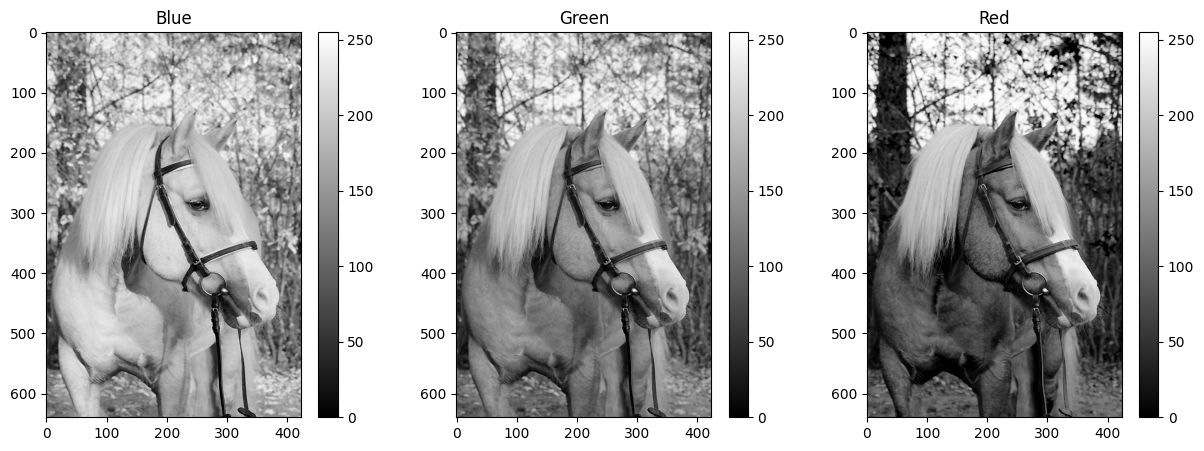

In [58]:
#41. Read some image file to Numpy array, investigate the dimensions of data and numerical values, what they mean? 
# Modify some color values and show the result. 
import matplotlib.pyplot as plt
image = plt.imread('./data/horse.jpg')
type(image)
image.shape #Pixel resolution of the image and three channels

import cv2
blue,green,red = cv2.split(image)
blue.shape
#Let's visualize image channels
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(blue,cmap='gray')
plt.title('Blue')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(green,cmap='gray')
plt.title('Green')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(red,cmap='gray')
plt.title('Red')
plt.colorbar()
plt.show()

In [65]:
conn.commit()   # ensure changes are written
conn.close()    # close the connection

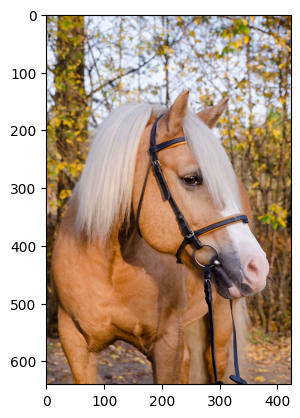

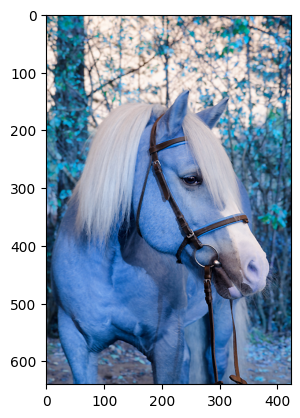

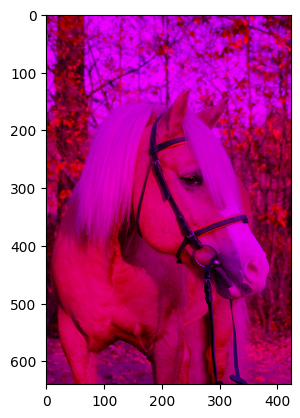

In [64]:
#Let's get back to the original image
image_merge = cv2.merge([blue,green,red])
plt.imshow(image_merge)
plt.show()

#Try reversed color channels
image_merge = cv2.merge([red,green,blue])
plt.imshow(image_merge)
plt.show()

#Try to put some channel to zero
image_merge = cv2.merge([blue,green*0,red])
plt.imshow(image_merge)
plt.show()